<a href="https://colab.research.google.com/github/RizkyFitriAndini/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

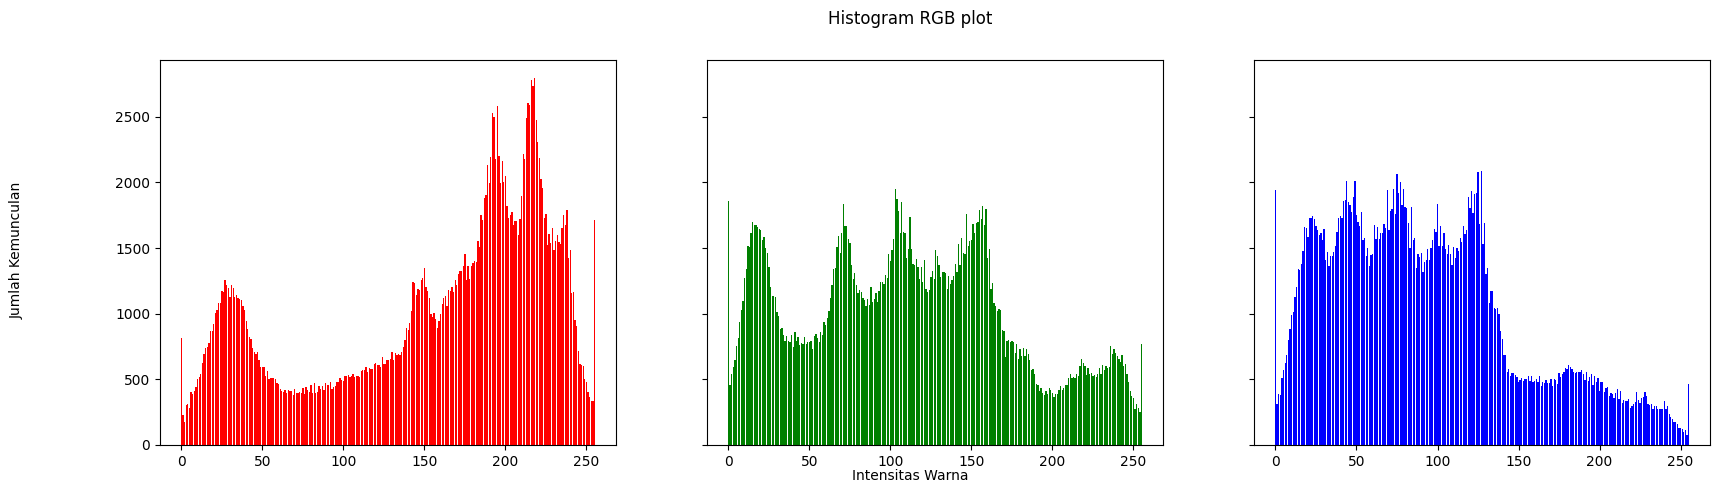

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)


height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue,color='blue')

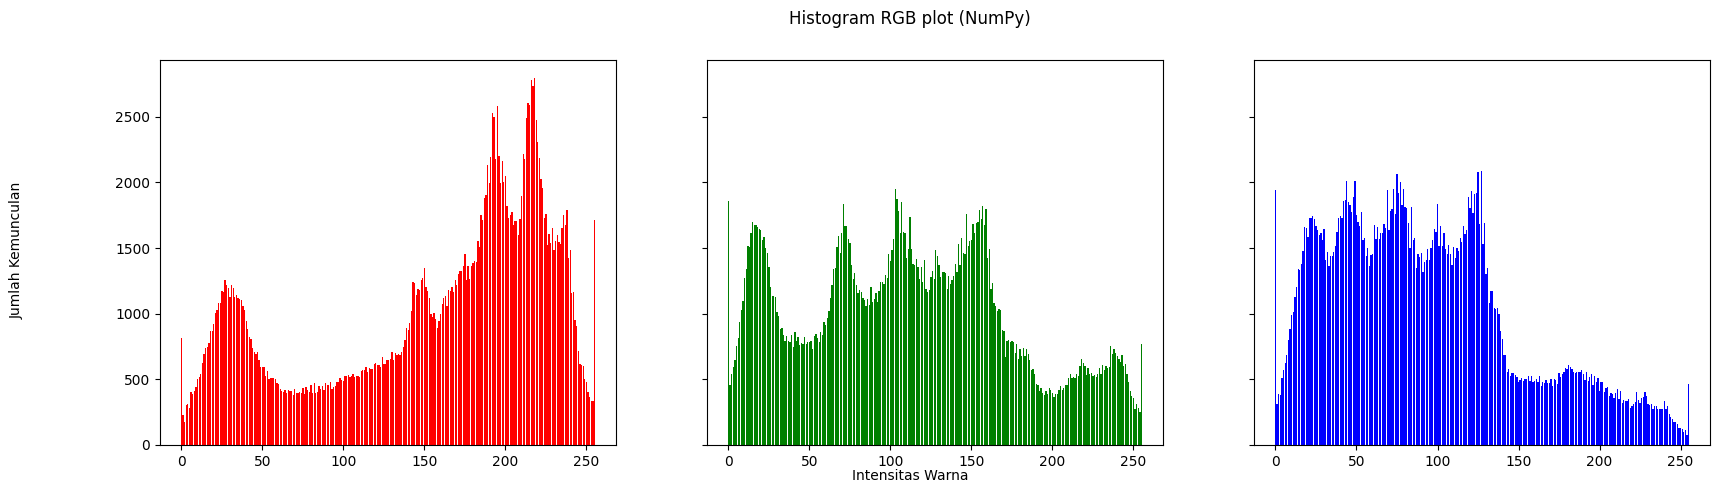

In [8]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red_hist, _ = np.histogram(img_rgb[:, :, 0], bins=256, range=(0, 256))
green_hist, _ = np.histogram(img_rgb[:, :, 1], bins=256, range=(0, 256))
blue_hist, _ = np.histogram(img_rgb[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')
plt.show()

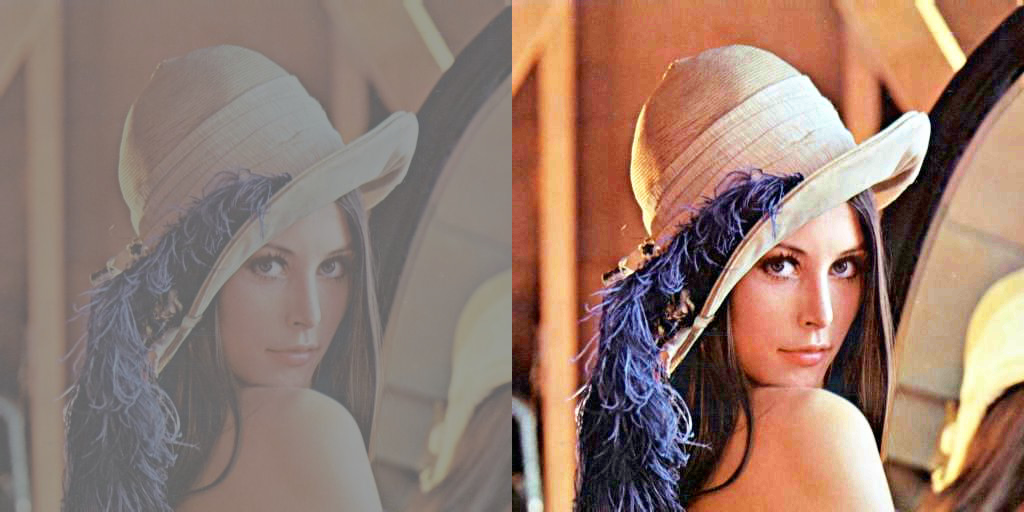

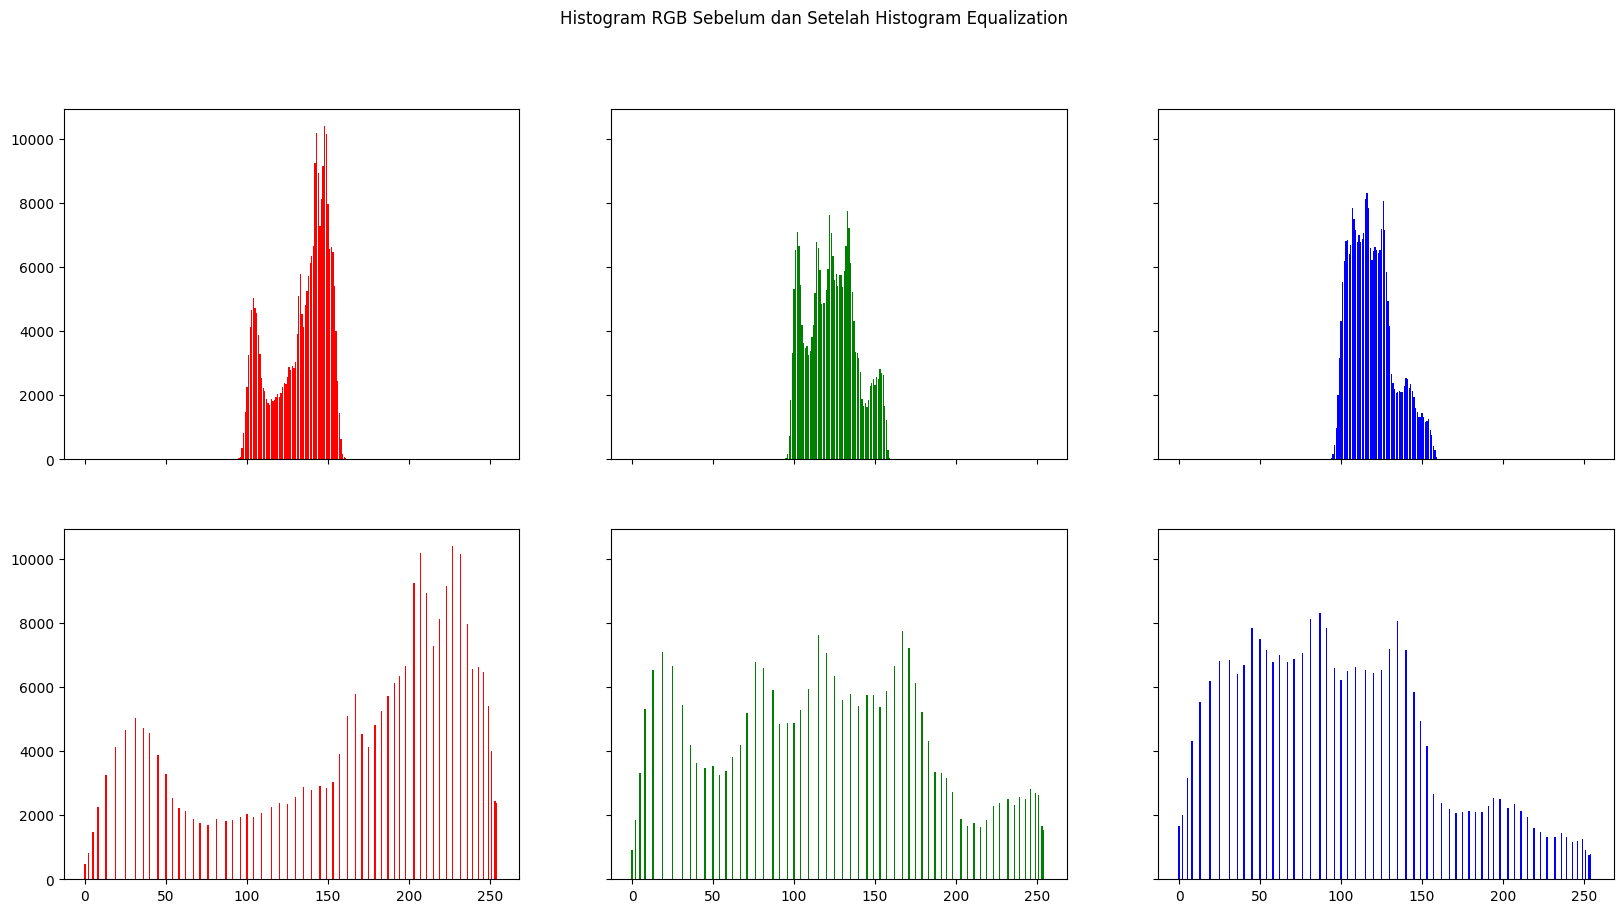

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena_lc.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mendapatkan ukuran gambar
height, width, _ = img_rgb.shape
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1  # Blue channel
            ax[1][img[y][x][1]] += 1  # Green channel
            ax[2][img[y][x][2]] += 1  # Red channel
    return ax

# Calculate the original histogram
histo_asli = histog(img)

# Convert to Numpy array
img_array = np.asarray(img)

# Step 1: Normalized cumulative histogram
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 3: Transformation
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]

# Reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img_eq = eq_img_array

# Compute equalized histogram
equal_histo = histog(img_eq)

# Concatenate images for comparison
final_frame = cv.hconcat((img, img_eq))
cv2_imshow(final_frame)

# Plot histogram RGB sebelum dan sesudah equalization
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20, 10], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Sebelum dan Setelah Histogram Equalization')

# Histogram sebelum equalization
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')

# Histogram setelah equalization
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

plt.show()

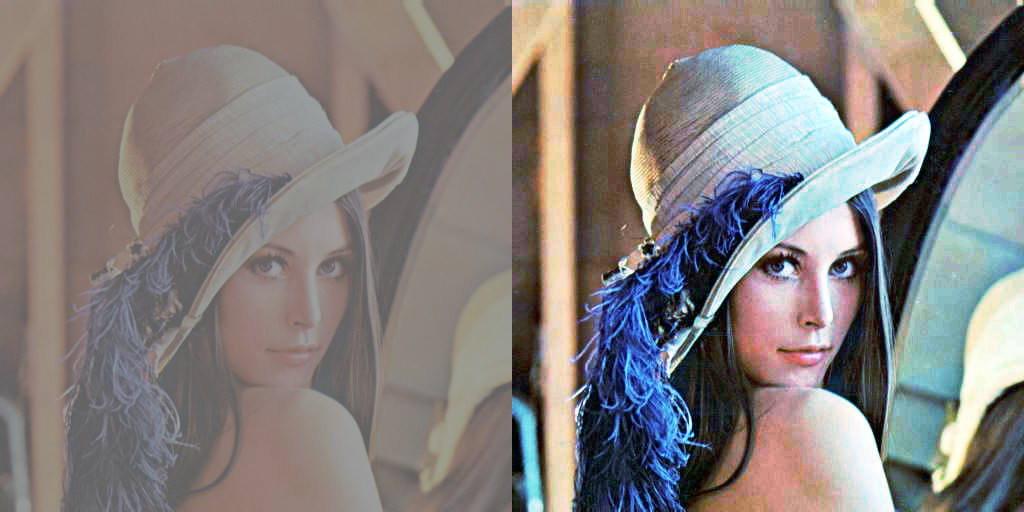

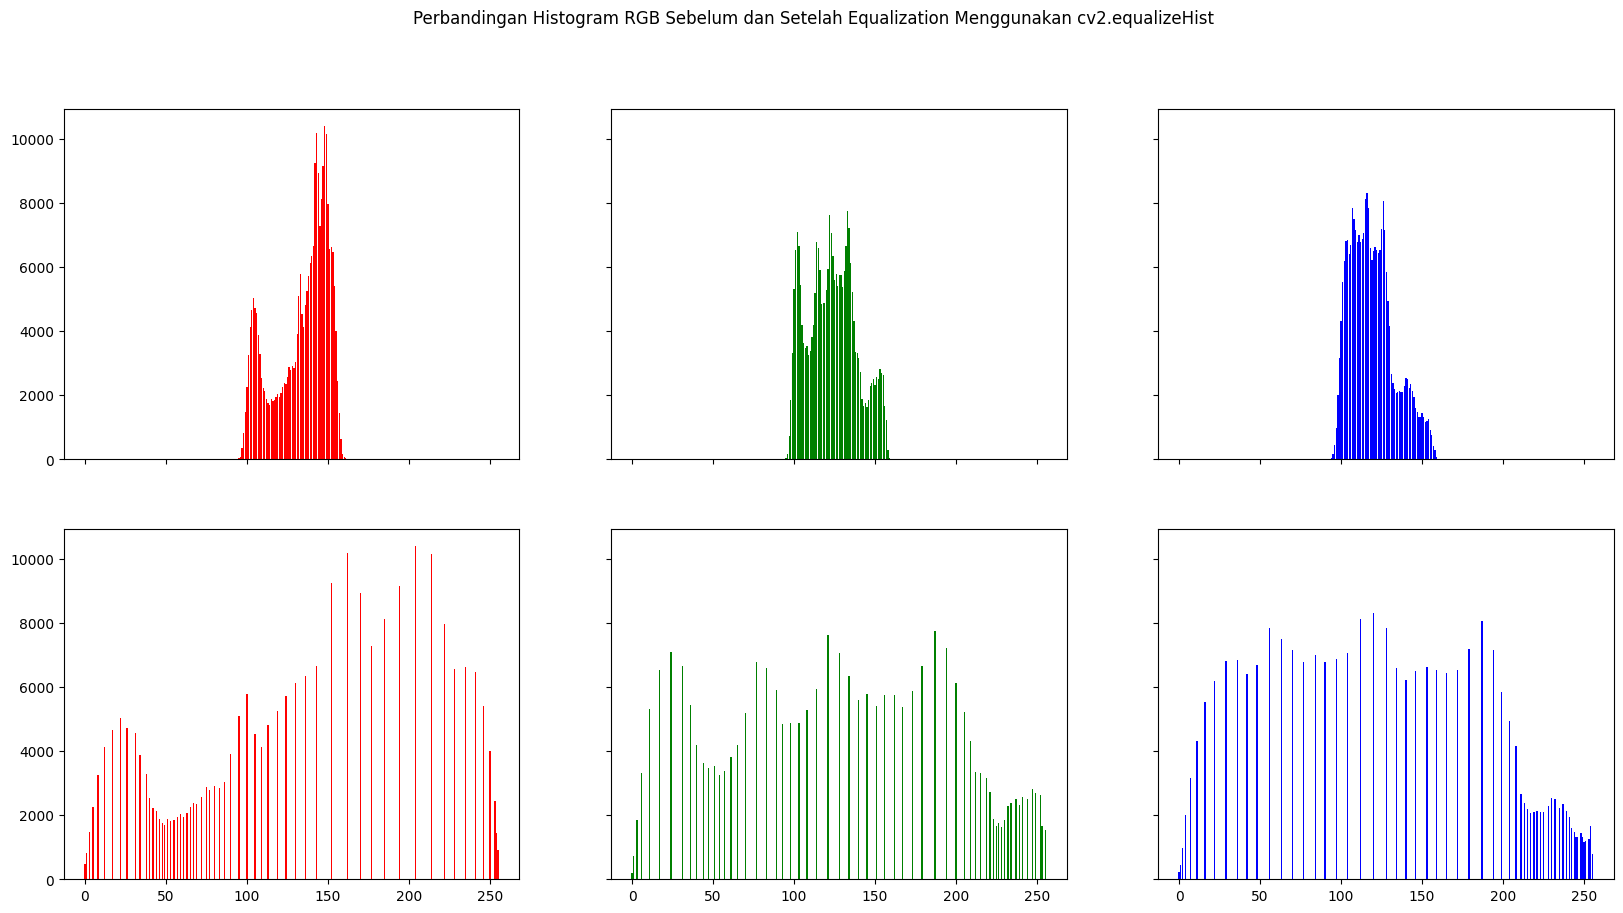

In [10]:
# Konversi gambar BGR ke RGB
img = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena_lc.jpg')

# Split gambar ke channel R, G, B
r, g, b = cv.split(img)

# Apply equalizeHist pada setiap channel (R, G, B)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali channel yang telah di-equalisasi
img_eq_cv2 = cv.merge((r_eq, g_eq, b_eq))

# Hitung histogram gambar yang di-equalisasi menggunakan cv2.equalizeHist
equal_histo_cv2 = histog(img_eq_cv2)

# Bandingkan hasil dengan hasil equalization manual
final_frame_cv2 = cv.hconcat((img, img_eq_cv2))
cv2_imshow(final_frame_cv2)

# Plot histogram RGB setelah equalization menggunakan cv2.equalizeHist
fig, axs = plt.subplots(2, 3, figsize=[20, 10], sharex=True, sharey=True)
fig.suptitle('Perbandingan Histogram RGB Sebelum dan Setelah Equalization Menggunakan cv2.equalizeHist')

# Histogram sebelum equalization
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')

# Histogram setelah equalization menggunakan cv2.equalizeHist
axs[1, 0].bar(names, equal_histo_cv2[2], color='red')
axs[1, 1].bar(names, equal_histo_cv2[1], color='green')
axs[1, 2].bar(names, equal_histo_cv2[0], color='blue')

plt.show()

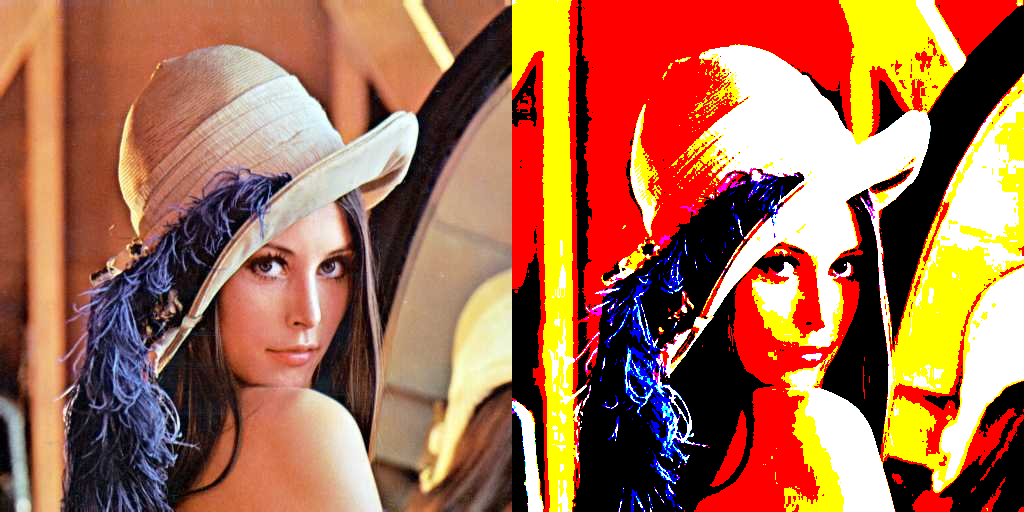

In [13]:
# Memuat gambar menggunakan OpenCV
img1 = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena.jpg')
img_16 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
# Mendefinisikan 8 warna target (RGB)
colors = {
    'black': [0, 0, 0],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'white': [255, 255, 255],
    'red': [255, 0, 0]  # Menambahkan merah jika diperlukan
}

# Fungsi untuk memetakan piksel ke warna terdekat
def closest_color(pixel, colors):
    colors_array = np.array(list(colors.values()))
    distances = np.sqrt(np.sum((colors_array - pixel) ** 2, axis=1))
    return colors_array[np.argmin(distances)]

# Membuat array output dan memetakan setiap piksel ke warna terdekat
output_array = np.zeros_like(img_16)

# Menerapkan kuantisasi warna
for i in range(img_16.shape[0]):
    for j in range(img_16.shape[1]):
        output_array[i, j] = closest_color(img_16[i, j], colors)

# Mengonversi gambar keluaran kembali menjadi format OpenCV (BGR)
output_img_cv2 = cv.cvtColor(output_array.astype('uint8'), cv.COLOR_RGB2BGR)
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
# Menampilkan gambar asli (16 juta warna) dan gambar hasil kuantisasi (8 warna)
final_frame_cv2 = cv.hconcat([img_16, output_img_cv2])

# Menampilkan gambar yang digabungkan menggunakan OpenCV
cv2_imshow(final_frame_cv2)


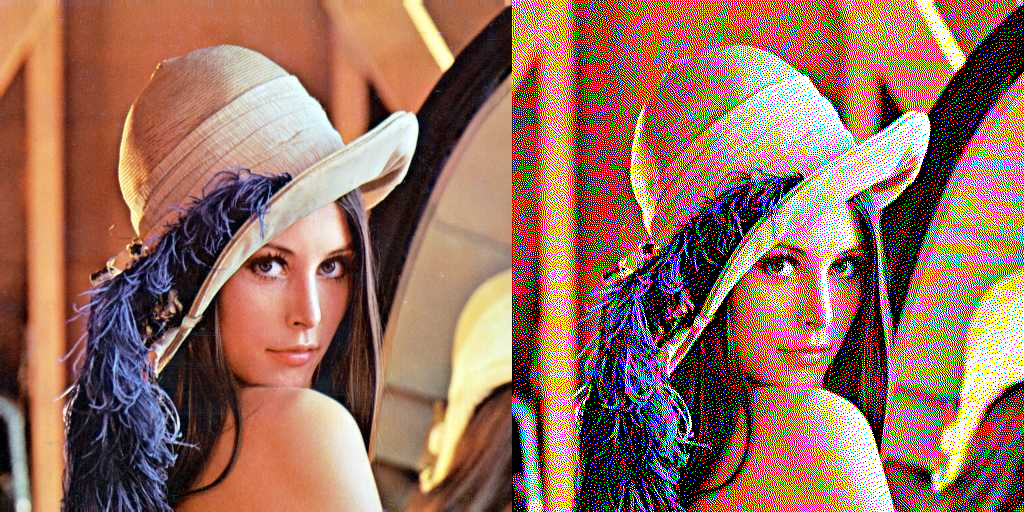

In [14]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena.jpg')
img_16 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

# Mendapatkan tinggi dan lebar gambar
height, width, channels = img1.shape
# Konversi ke tipe float
img_float = np.float64(img1)
# Floyd-Steinberg dithering function untuk setiap saluran warna
for y in range(height):
  for x in range(width):
    for c in range(channels):  # Loop melalui 3 saluran warna (BGR)
                old_pixel = img1[y, x, c]
                new_pixel = 255 if old_pixel > 127 else 0  # Thresholding
                img_float[y, x, c] = new_pixel
                quant_error = old_pixel - new_pixel

                # Sebarkan error ke tetangga
                if x + 1 < width:  # R1
                    img1[y, x + 1, c] = np.clip(img1[y, x + 1, c] + quant_error * 7 / 16, 0, 255)
                if y + 1 < height:  # R2
                    img1[y + 1, x, c] = np.clip(img1[y + 1, x, c] + quant_error * 5 / 16, 0, 255)
                    if x - 1 >= 0:  # R4
                        img1[y + 1, x - 1, c] = np.clip(img1[y + 1, x - 1, c] + quant_error * 3 / 16, 0, 255)
                    if x + 1 < width:  # R3
                        img1[y + 1, x + 1, c] = np.clip(img1[y + 1, x + 1, c] + quant_error * 1 / 16, 0, 255)

out = np.uint8(img_float)
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
# Menampilkan gambar asli dan hasil dithering
final_frame = cv.hconcat([img_16, out])

# Menampilkan gambar yang digabungkan
cv2_imshow(final_frame)

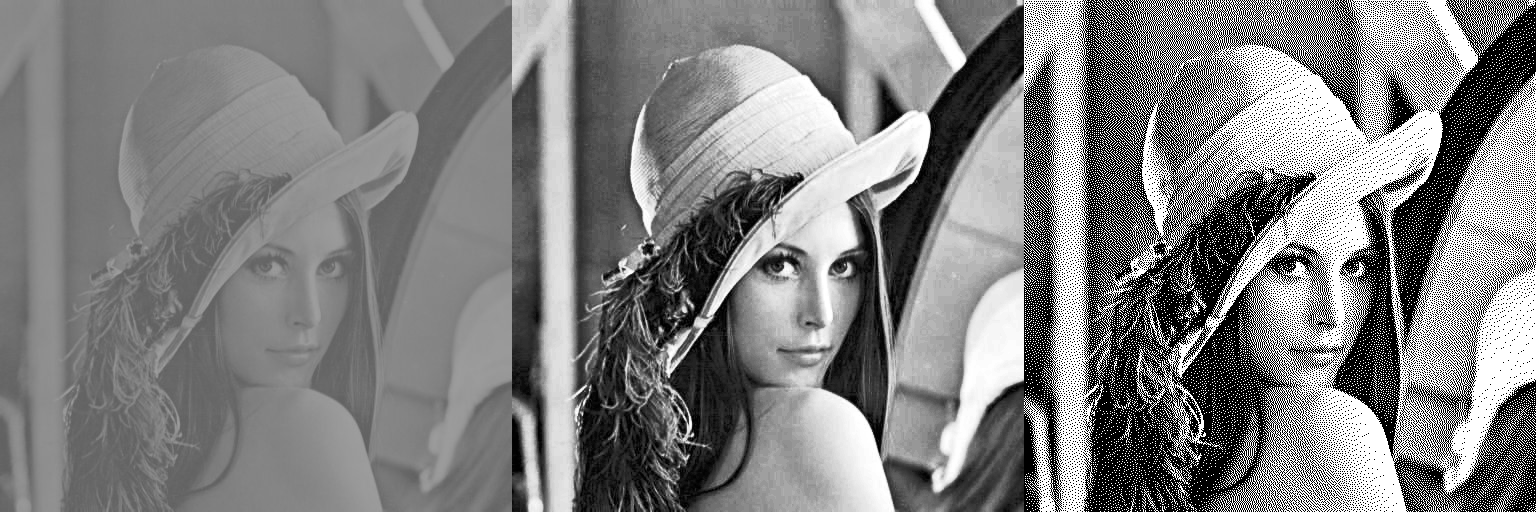

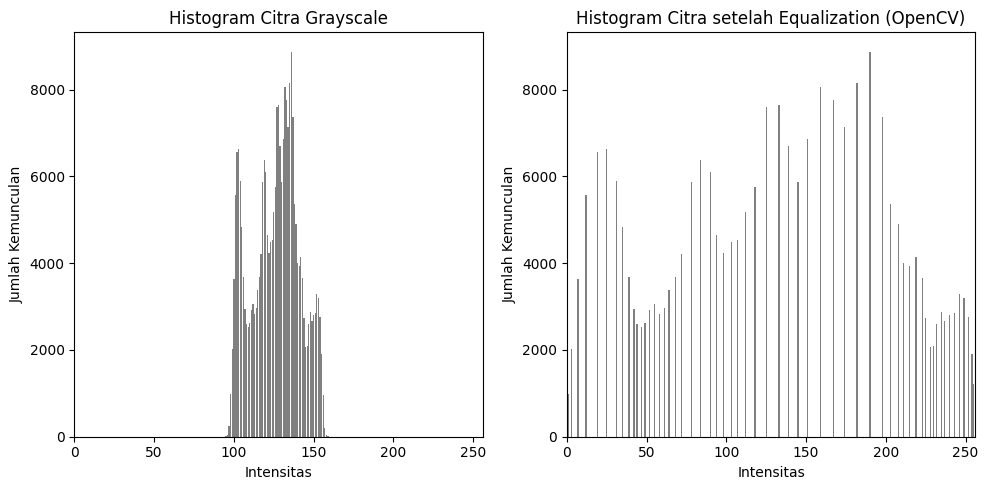

In [22]:
img = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena_lc.jpg')

# Mengonversi gambar menjadi grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menerapkan histogram equalization
img_equalized = cv.equalizeHist(img_gray)

# Mendapatkan tinggi dan lebar gambar
height, width = img_equalized.shape

# Fungsi untuk Floyd-Steinberg Dithering
def floyd_steinberg_dithering(img):
    img_float = np.float64(img)  # Konversi ke tipe float
    for y in range(height):
        for x in range(width):
            old_pixel = img_float[y, x]
            new_pixel = 255 if old_pixel > 127 else 0  # Thresholding
            img_float[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Sebarkan error ke tetangga
            if x + 1 < width:  # R1
                img_float[y, x + 1] += quant_error * 7 / 16
            if y + 1 < height:  # R2
                img_float[y + 1, x] += quant_error * 5 / 16
                if x - 1 >= 0:  # R4
                    img_float[y + 1, x - 1] += quant_error * 3 / 16
                if x + 1 < width:  # R3
                    img_float[y + 1, x + 1] += quant_error * 1 / 16

    return np.clip(img_float, 0, 255).astype(np.uint8)  # Pastikan nilai dalam rentang 0-255

# Menerapkan dithering Floyd-Steinberg
dithered_img = floyd_steinberg_dithering(img_equalized)

# Menampilkan gambar asli, gambar setelah histogram equalization, dan gambar hasil dithering
final_frame = cv.hconcat([img_gray, img_equalized, dithered_img])
cv2_imshow(final_frame)

# Plot histogram citra grayscale dan equalized
plt.figure(figsize=(10, 5))

# Histogram untuk citra grayscale
plt.subplot(1, 2, 1)
plt.title('Histogram Citra Grayscale')
plt.bar(np.arange(256), cv.calcHist([img_gray], [0], None, [256], [0, 256]).flatten(), color='gray')
plt.xlim([0, 256])
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')

# Histogram untuk citra yang sudah di-equalisasi
plt.subplot(1, 2, 2)
plt.title('Histogram Citra setelah Equalization (OpenCV)')
plt.bar(np.arange(256), cv.calcHist([img_equalized], [0], None, [256], [0, 256]).flatten(), color='gray')
plt.xlim([0, 256])
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()